In [18]:
import torch
from torch.autograd import Variable
import torch.optim as optim
import torch.nn as nn
import torchvision
print(torch.__version__)
import matplotlib.pyplot as plt
import numpy as np

def scaler(vector, ceiling):
    vector = vector.float()
    min_v = torch.min(vector).float()
    range_v = torch.max(vector) - min_v
    if range_v > 0:
        normalised = (vector - min_v) / range_v * ceiling
    else:
        normalised = torch.zeros(vector.size())
    return normalised

0.4.1


In [7]:
torch.set_default_tensor_type('torch.FloatTensor')
Iv3 = torchvision.models.inception_v3(pretrained=True)
for i in Iv3.parameters():
    i.requires_grad = False

criterion = nn.CrossEntropyLoss()
h = []
x = Variable(torch.randn(2, 3, 299, 299), requires_grad=True)
target = torch.empty(2, dtype=torch.long).random_(1000)
print(target)

tensor([ 80, 126])


In [10]:
for i in range(100):
    output = Iv3(x)
    loss = criterion(output[0], target)
    h.append(loss.item())
    loss.backward()
    x.grad.data.zero_()
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17


KeyboardInterrupt: 

In [19]:
a = scaler(x.detach(), 1).numpy()[0,:,:,:].transpose(1,2,0)
b = scaler(x.detach(), 1).numpy()[1,:,:,:].transpose(1,2,0)

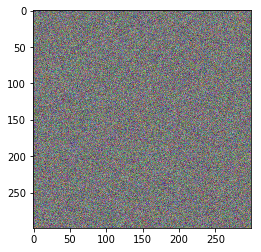

In [21]:
plt.imshow(b)